# Data Cleaning

In [3]:
library(dplyr)
library(ggplot2)

In [2]:
#load data
rent <- read.csv('fang88_rent.csv',na.strings=c("NA","NaN", " ","NULL"))
house <- read.csv('home.csv',na.strings=c("NA","NaN", " ","NULL"))

In [4]:
#pick the columns to use in rent and check the statistics of rent dataset
rent_use <- rent[,5:6]
str(rent_use)
summary(rent_use)
rent_use$unique_id <- as.character(rent_use$unique_id)

'data.frame':	1048575 obs. of  2 variables:
 $ rentzestimate_amount: int  16619 3495 4448 1430 1400 1375 4556 2500 1850 1650 ...
 $ unique_id           : Factor w/ 1048571 levels "5.7035E+13","5.71614E+13",..: 614907 614902 75 79 78 80 76 115985 79253 937583 ...


 rentzestimate_amount       unique_id      
 Min.   :   400       5.74132E+13:      2  
 1st Qu.:  1550       5.81157E+13:      2  
 Median :  2200       5.82614E+13:      2  
 Mean   :  2994       5.89261E+13:      2  
 3rd Qu.:  3200       5.7035E+13 :      1  
 Max.   :250000       5.71614E+13:      1  
 NA's   :87721        (Other)    :1048565  

In [5]:
#remove duplicated unique_id
rent_use[duplicated(rent_use$unique_id),]
rent_use <- rent_use %>%
  distinct(unique_id, .keep_all = TRUE)

,rentzestimate_amount,unique_id
1903,1800,5.74132E+13
8566,NA,5.81157E+13
9170,NA,5.82614E+13
422192,2962,5.89261E+13


In [6]:
#check the statistics of house dataset
str(house)
summary(house)

#remove duplicated unique_id
house[duplicated(house$unique_id),] # no duplicated records shown
house$unique_id <- as.character(house$unique_id)

'data.frame':	352221 obs. of  13 variables:
 $ unique_id    : Factor w/ 352221 levels "ABOR_11622550",..: 9 12 33 52 58 59 63 65 73 75 ...
 $ bathrooms    : num  1 5 3 2 3 2 3 3 3 4 ...
 $ bedrooms     : int  1 3 3 2 4 3 3 4 3 5 ...
 $ city         : Factor w/ 5182 levels "","29 Palms",..: 192 589 4097 192 192 4176 2484 3560 644 2072 ...
 $ list_price   : int  225000 6850000 334900 735000 2800000 65000 349990 349990 975000 268004 ...
 $ latitude     : num  30.4 30.7 29.9 30.3 30.3 ...
 $ longitude    : num  -98 -98.2 -98 -97.7 -97.8 ...
 $ property_type: Factor w/ 12 levels "APT","COND","COOP",..: 11 11 2 1 11 11 11 11 11 11 ...
 $ lot_sqft     : int  0 640 0 0 1 0 NA NA 45 0 ...
 $ sqft         : int  704 4889 2351 1416 2016 2562 2148 2912 2975 2495 ...
 $ state        : Factor w/ 55 levels "","AK","AL","AR",..: 46 46 46 46 46 46 46 46 46 46 ...
 $ year_built   : int  1955 2000 2016 2004 1962 1900 2015 2016 1990 2015 ...
 $ zip          : Factor w/ 7456 levels "",".","0","1",..: 5245 

         unique_id        bathrooms         bedrooms               city       
 ABOR_11622550:     1   Min.   : 0.000   Min.   : 0.000   Houston    : 15981  
 ABOR_13245505:     1   1st Qu.: 2.000   1st Qu.: 3.000   Miami      :  8342  
 ABOR_13245677:     1   Median : 2.000   Median : 3.000   Chicago    :  7599  
 ABOR_13260708:     1   Mean   : 2.478   Mean   : 3.364   Las Vegas  :  4558  
 ABOR_13811525:     1   3rd Qu.: 3.000   3rd Qu.: 4.000   Miami Beach:  3412  
 ABOR_14937134:     1   Max.   :99.990   Max.   :99.000   (Other)    :311842  
 (Other)      :352215   NA's   :2651     NA's   :13277    NA's       :   487  
   list_price           latitude        longitude        property_type   
 Min.   :        0   Min.   :-81.27   Min.   :-159.676   RESI   :248616  
 1st Qu.:   219999   1st Qu.: 29.50   1st Qu.: -97.995   APT    : 56486  
 Median :   369900   Median : 33.21   Median : -88.117   COND   : 17390  
 Mean   :   690378   Mean   : 33.73   Mean   : -93.935   RENT   : 10023 

unique_id,bathrooms,bedrooms,city,list_price,latitude,longitude,property_type,lot_sqft,sqft,state,year_built,zip


In [7]:
#inner join house with rent_use by unique_id
house_rent <- merge(house,rent_use, by="unique_id") #inner join
str(house_rent)
summary(house_rent)

'data.frame':	221961 obs. of  14 variables:
 $ unique_id           : chr  "ABOR_11622550" "ABOR_13245505" "ABOR_13245677" "ABOR_13260708" ...
 $ bathrooms           : num  2 1 1 1 2 3 3 5 1 2 ...
 $ bedrooms            : int  2 1 1 1 2 4 4 4 1 2 ...
 $ city                : Factor w/ 5182 levels "","29 Palms",..: 4663 1717 1717 1717 551 2484 192 1557 192 4388 ...
 $ list_price          : int  249900 79500 79500 119000 342850 700000 550000 1899000 225000 995000 ...
 $ latitude            : num  30.9 30.6 30.6 30.6 30.7 ...
 $ longitude           : num  -98.5 -98.4 -98.4 -98.4 -98.4 ...
 $ property_type       : Factor w/ 12 levels "APT","COND","COOP",..: 11 1 1 1 11 11 11 11 11 11 ...
 $ lot_sqft            : int  1 NA NA NA 1 2 4 102 0 77 ...
 $ sqft                : int  2324 957 957 957 1592 2808 2500 5692 704 1950 ...
 $ state               : Factor w/ 55 levels "","AK","AL","AR",..: 46 46 46 46 46 46 46 46 46 46 ...
 $ year_built          : int  1950 1982 1982 1982 2000 1993 2015 20

  unique_id           bathrooms         bedrooms              city       
 Length:221961      Min.   : 0.000   Min.   : 0.00   Houston    : 10575  
 Class :character   1st Qu.: 2.000   1st Qu.: 3.00   Miami      :  6050  
 Mode  :character   Median : 2.000   Median : 3.00   Chicago    :  4051  
                    Mean   : 2.547   Mean   : 3.39   Las Vegas  :  2846  
                    3rd Qu.: 3.000   3rd Qu.: 4.00   Miami Beach:  2789  
                    Max.   :99.990   Max.   :51.00   Austin     :  2266  
                    NA's   :1655     NA's   :8523    (Other)    :193384  
   list_price           latitude        longitude       property_type   
 Min.   :        1   Min.   :-81.27   Min.   :-159.68   RESI   :154836  
 1st Qu.:   220000   1st Qu.: 28.73   1st Qu.: -97.74   APT    : 36634  
 Median :   379800   Median : 33.03   Median : -87.85   COND   :  9585  
 Mean   :   750569   Mean   : 33.40   Mean   : -93.13   RENT   :  8657  
 3rd Qu.:   694000   3rd Qu.: 37.30   3rd Q

In [8]:
#create a function imp.median to replace NA with median
imp.median <- function (a){
  missing <- is.na(a)
  imputed <- a
  imputed[missing] <- median(a,  na.rm=TRUE)
  return (imputed)
}

0%      1%  99.99%    100% 
  0.000   0.000  18.804 100.000

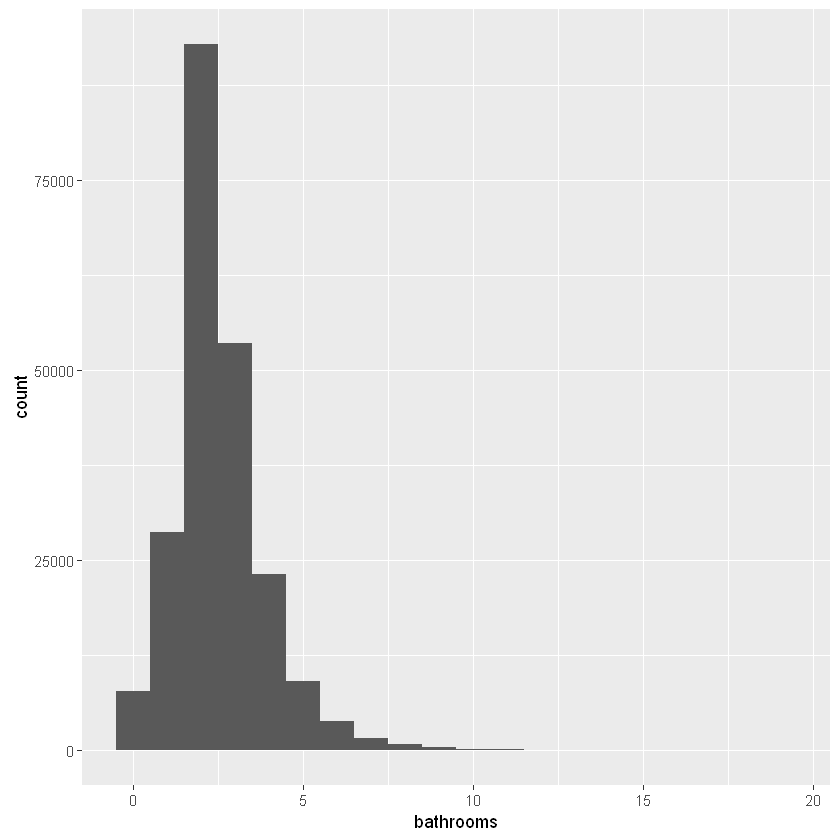

In [9]:
#cleaning of feature:bathrooms
house_rent$bathrooms <- round(house_rent$bathrooms,0) # round float to the nearest integer
house_rent$bathrooms <- imp.median(house_rent$bathrooms) # interpolate median

quantile(house_rent$bathrooms, c(0,0.01,0.9999,1), na.rm = TRUE) #capping of outliers--0.9999
house_rent$bathrooms[house_rent$bathrooms > quantile(house_rent$bathrooms,0.9999, na.rm = TRUE)] =
  quantile(house_rent$bathrooms, 0.9999, na.rm = TRUE)

# visulization 
ggplot(house_rent, aes(bathrooms)) +
  geom_histogram(binwidth = 1)

0%     1% 99.99%   100% 
     0      1     18     51

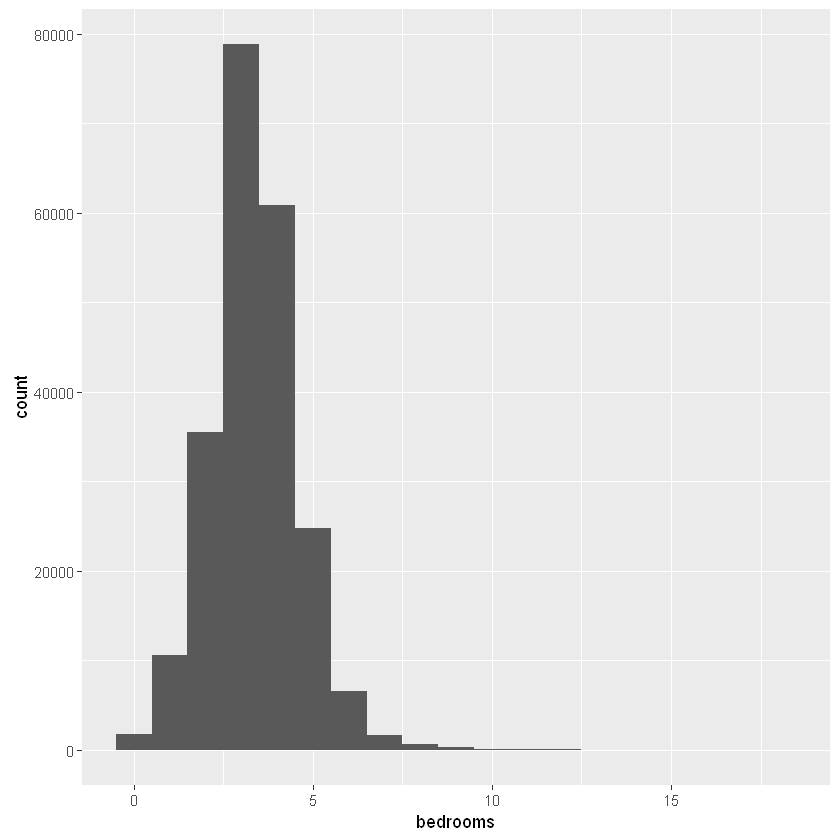

In [10]:
#cleaning of feature:bedrooms
house_rent$bedrooms <- imp.median(house_rent$bedrooms) #interpolate median

quantile(house_rent$bedrooms, c(0, 0.01, 0.9999,1), na.rm = TRUE) #capping of outliers--0.9999
house_rent$bedrooms[house_rent$bedrooms > quantile(house_rent$bedrooms,0.9999, na.rm = TRUE)] =
  quantile(house_rent$bedrooms, 0.9999, na.rm = TRUE)

#visualization
ggplot(house_rent, aes(bedrooms)) +
  geom_histogram(binwidth = 1)

0%       1%   99.99%     100% 
1.00e+00 1.35e+03 6.50e+07 2.50e+08

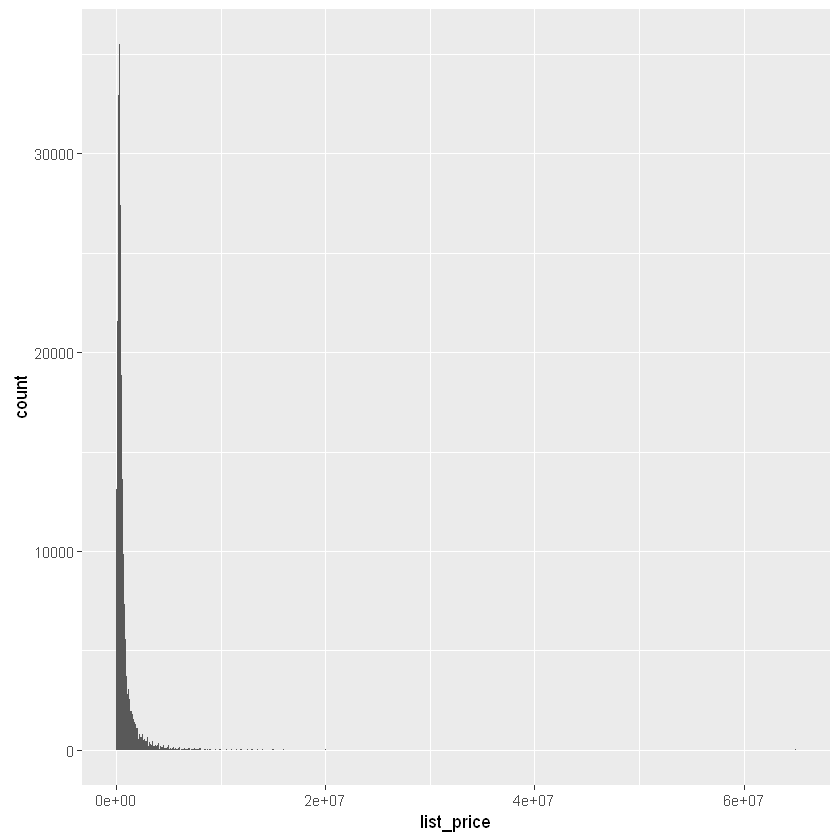

In [11]:
#cleaning of feature:list_price
house_rent$list_price <- imp.median(house_rent$list_price) #interpolate median

quantile(house_rent$list_price, c(0,0.01,0.9999,1), na.rm = TRUE) #capping of outliers--0.9999
house_rent$list_price[house_rent$list_price > quantile(house_rent$list_price,0.9999, na.rm = TRUE)] = 
  quantile(house_rent$list_price, 0.9999, na.rm = TRUE)
#visualization -- right skewed
ggplot(house_rent, aes(list_price)) +
  geom_histogram(binwidth = 100000)

In [12]:
#cleaning of feature:latitude and longtitude
house_rent$latitude <- imp.median(house_rent$latitude) #interpolate median
house_rent$longitude <- imp.median(house_rent$longitude)

0%         1%      99.9%       100% 
         0          0    4318364 1973355120

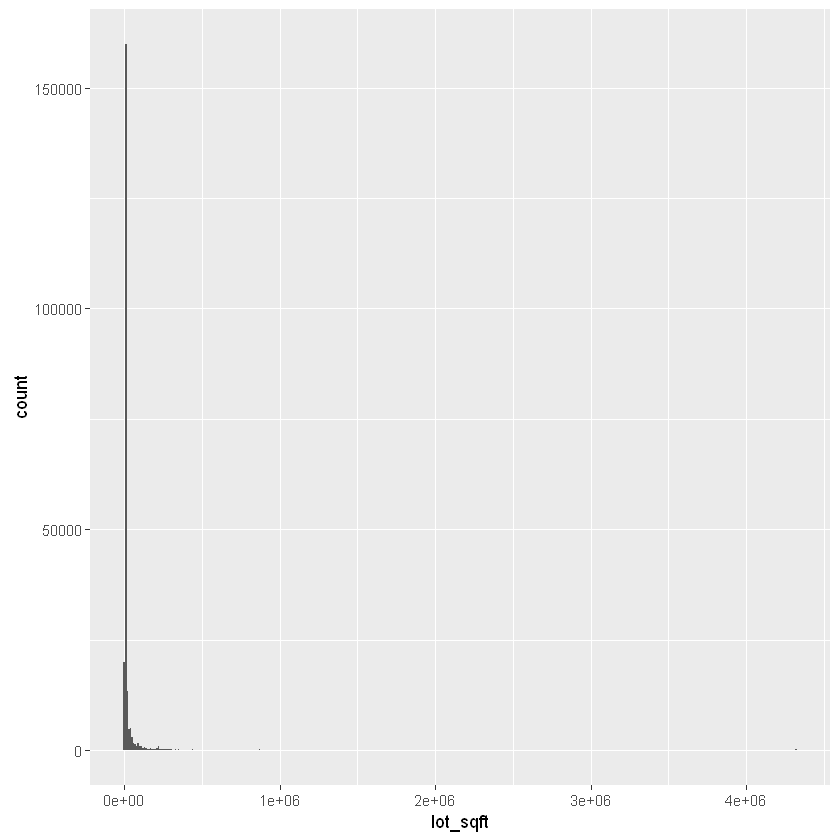

In [13]:
#cleaning of feature:lot_sqft
house_rent$lot_sqft <- imp.median(house_rent$lot_sqft)#interpolate median

quantile(house_rent$lot_sqft, c(0,0.01,0.999,1), na.rm = TRUE)#capping of outliers--0.999

house_rent$lot_sqft[house_rent$lot_sqft > quantile(house_rent$lot_sqft,0.999, na.rm = TRUE)] = 
  quantile(house_rent$lot_sqft, 0.999, na.rm = TRUE)
# lot_sqft equals 0 is strange, replace 0 with median

house_rent$lot_sqft[house_rent$lot_sqft == 0] <- median(house_rent$lot_sqft)
# visualization -- right-skewed
ggplot(house_rent, aes(lot_sqft)) +
  geom_histogram(binwidth = 10000) 

0%        1%     99.9%      100% 
     0.00      0.00  15873.76 854454.00

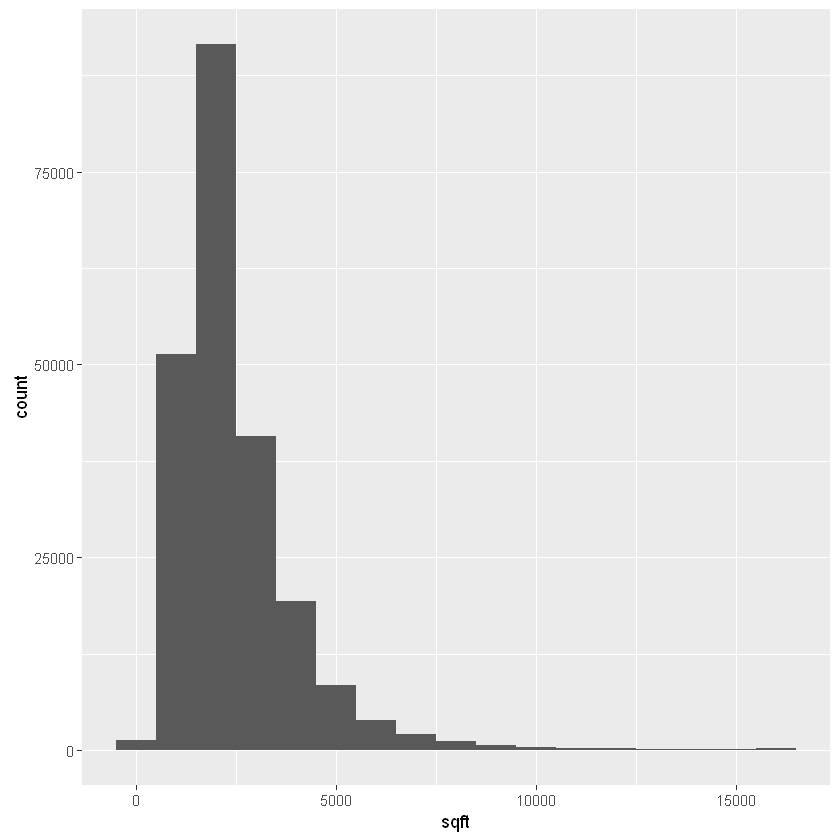

In [14]:
#cleaning of feature:sqft
house_rent$sqft <- imp.median(house_rent$sqft) #interpolate median

quantile(house_rent$sqft, c(0,0.01,0.999,1), na.rm = TRUE) #capping of outliers--0.999
house_rent$sqft[house_rent$sqft > quantile(house_rent$sqft,0.999, na.rm = TRUE)] = 
  quantile(house_rent$sqft, 0.999, na.rm = TRUE)

# sqft equals 0 is strange, replace 0 with median
house_rent$sqft[house_rent$sqft == 0] <- median(house_rent$sqft)

#visualization -- right-skewed
ggplot(house_rent, aes(sqft)) +
  geom_histogram(binwidth = 1000) 

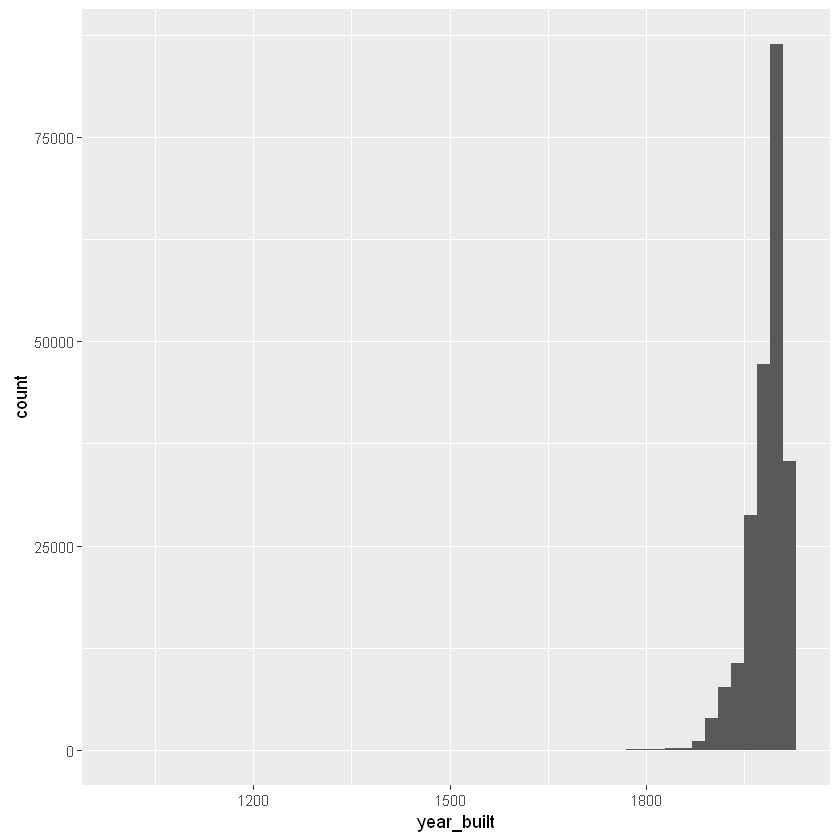

In [15]:
#cleaning of feature:year_built
house_rent$year_built <- imp.median(house_rent$year_built) #interpolate median

#for year_built, earlier than 1000 and later than 2017 will be replaced by median
house_rent$year_built[house_rent$year_built < 1000 | house_rent$year_built > 2017] <-
  median(house_rent$year_built)
#visualization -- left-skewed
ggplot(house_rent, aes(year_built)) +
  geom_histogram(binwidth = 20)

In [16]:
#cleaning of feature: state and zip code
#chose rows with state/zip not being NA
house_rent <- house_rent[!is.na(house_rent$state) & !is.na(house_rent$zip),]
#zip code completion for zip codes equals 5 digits (add 0 in the front)
length(house_rent$zip[as.numeric(as.character(house_rent$zip))<1000])
#since those less than 4 digits are only four records, so delete the records
house_rent <- house_rent[house_rent$zip[as.numeric(as.character(house_rent$zip))>=1000],]

Warning message in NextMethod("["):
"NAs introduced by coercion"

[1] 4

Warning message in NextMethod("["):
"NAs introduced by coercion"

0%     1% 99.99%   100% 
   599    975  97109 155487

Warning message:
"Removed 198 rows containing non-finite values (stat_bin)."

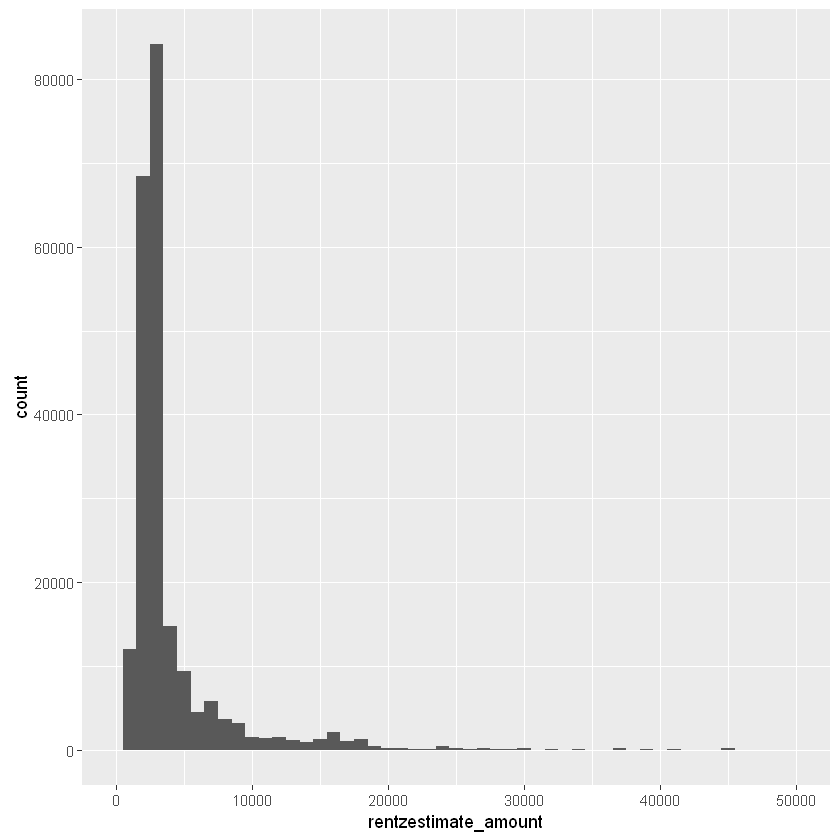

In [17]:
#cleaning of feature:rentzestimate_amount
house_rent$rentzestimate_amount <- imp.median(house_rent$rentzestimate_amount) #interpolate median

quantile(house_rent$rentzestimate, c(0,0.01,0.9999,1), na.rm = TRUE) 
#visualization -- right-skewed
ggplot(house_rent, aes(rentzestimate_amount)) +
  geom_histogram(binwidth = 1000) + 
  xlim(0,50000)

In [18]:
#checked the statistics of the cleaned dataset again
summary(house_rent)
#save as csv
write.csv(house_rent,'house_rent.csv')

  unique_id           bathrooms         bedrooms               city       
 Length:221947      Min.   : 0.000   Min.   : 0.000   Austin     : 65399  
 Class :character   1st Qu.: 2.000   1st Qu.: 3.000   Palm Desert: 12185  
 Mode  :character   Median : 3.000   Median : 4.000   Georgetown : 12024  
                    Mean   : 3.279   Mean   : 3.516   Leander    : 11486  
                    3rd Qu.: 4.000   3rd Qu.: 4.000   La Quinta  : 10670  
                    Max.   :18.804   Max.   :13.000   (Other)    :110182  
                    NA's   :1        NA's   :1        NA's       :     1  
   list_price          latitude       longitude         property_type   
 Min.   :    5000   Min.   :29.48   Min.   :-120.59   RESI     :189931  
 1st Qu.:  303900   1st Qu.:30.30   1st Qu.: -98.36   APT      : 25893  
 Median :  450000   Median :30.48   Median : -97.87   COND     :  4531  
 Mean   :  820416   Mean   :31.19   Mean   :-101.79   MULT     :  1527  
 3rd Qu.:  749000   3rd Qu.:31.10  